## California Housing data analysis

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
housing  = pd.read_csv("datasets/housing/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

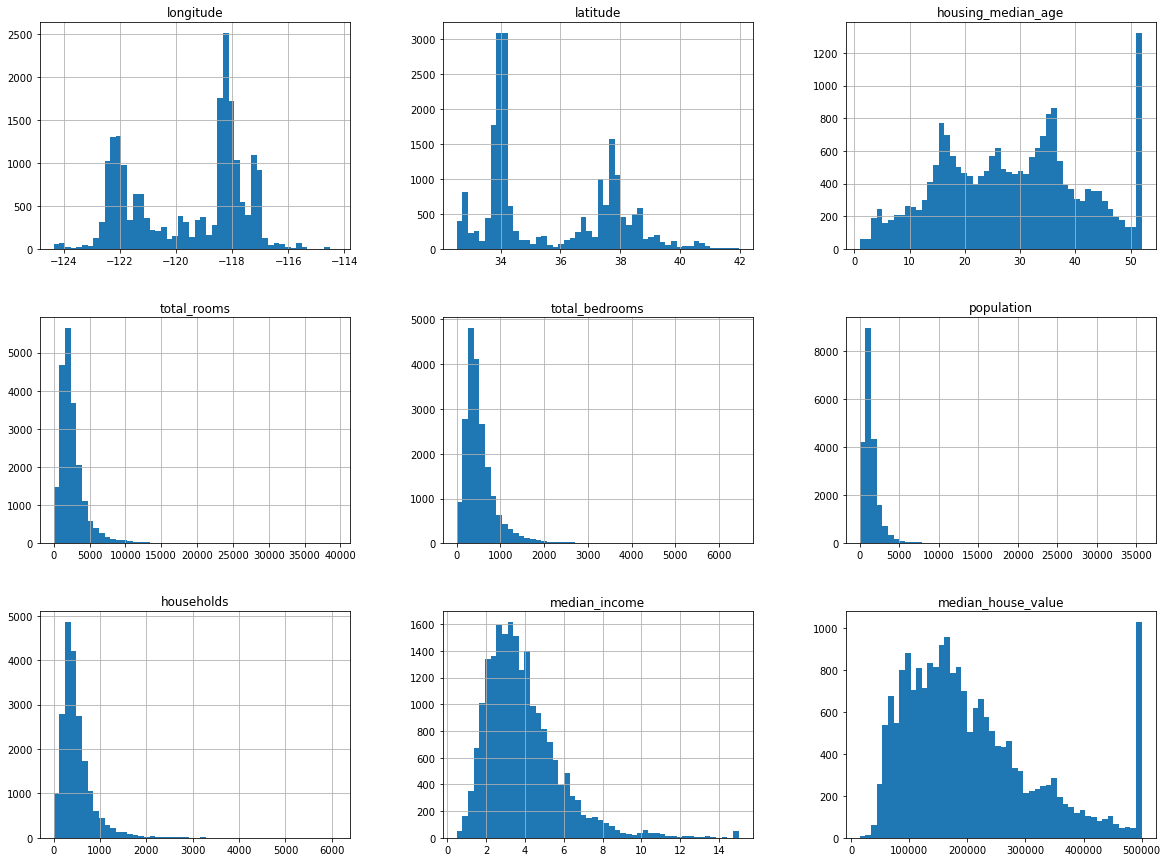

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.grid(False)
plt.show()

In [8]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

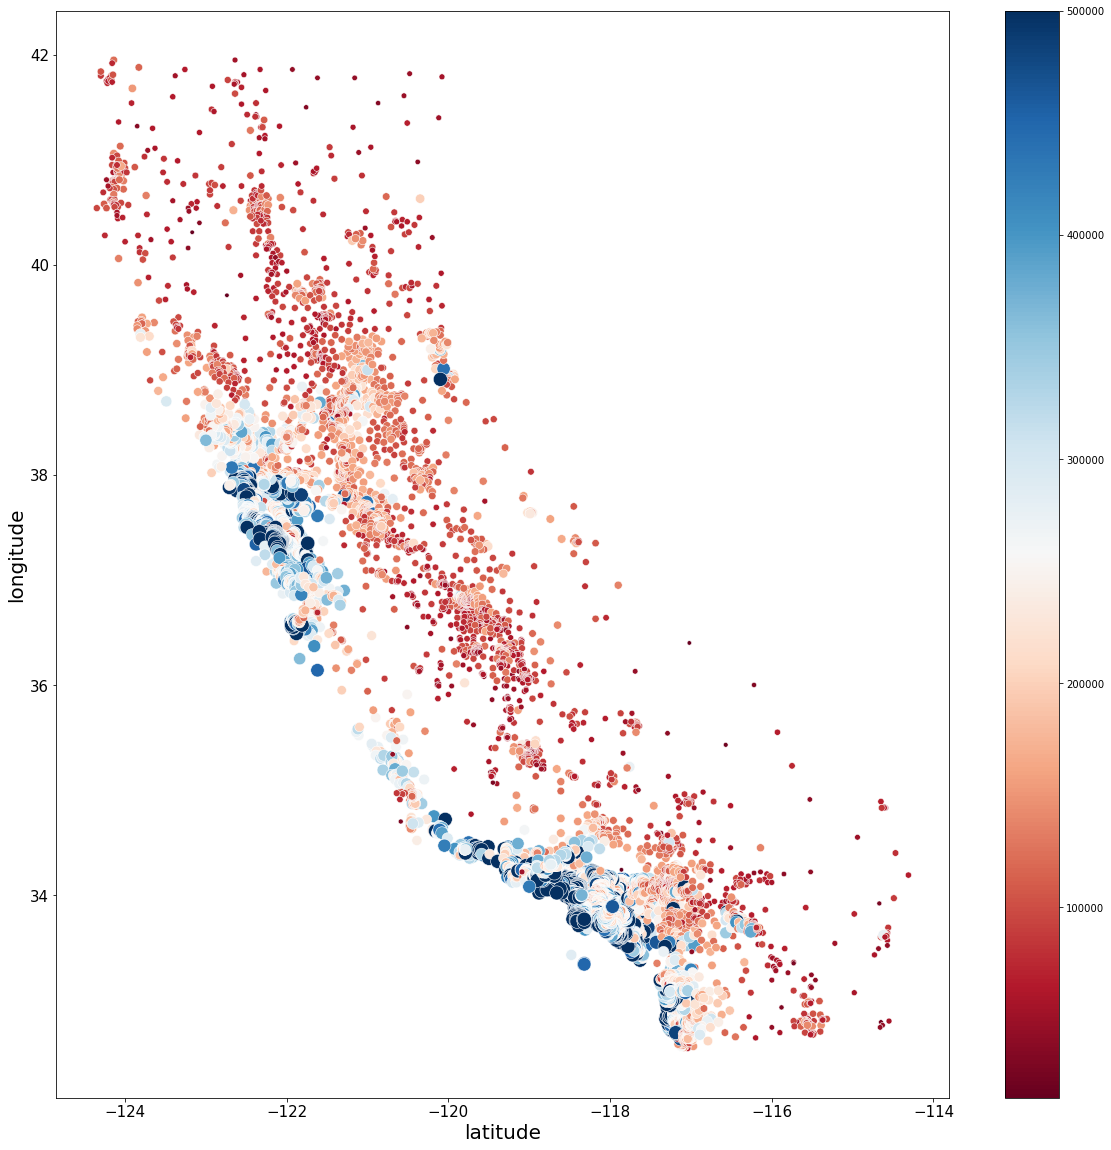

In [13]:
fig = plt.figure(figsize=(20,20))
p = sns.scatterplot(data=housing, x="longitude", y="latitude", hue=housing["median_house_value"],
size=housing["median_house_value"], sizes=(20, 200), palette='RdBu')
p.set_xlabel("latitude", size=20)
p.set_ylabel("longitude", size=20)
plt.xticks(size=15)
plt.yticks(size=15)

norm = plt.Normalize(housing["median_house_value"].min(), housing["median_house_value"].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
p.get_legend().remove()
p.figure.colorbar(sm)
plt.show()

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

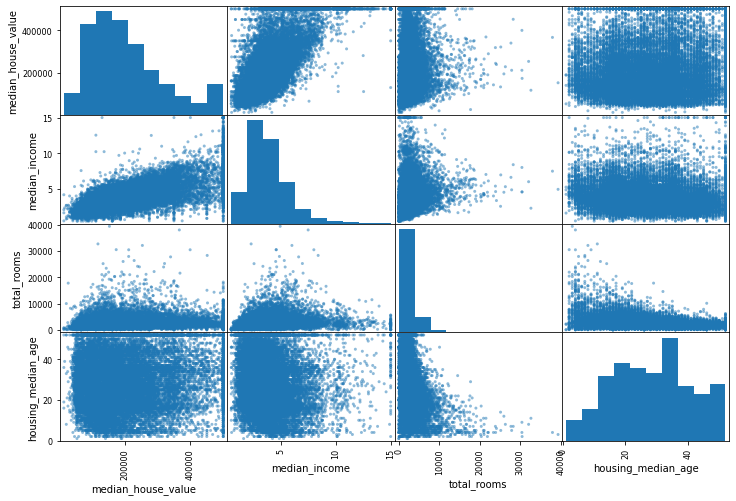

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### Data cleaning

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
housing.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [18]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)